# Intro
https://www.kaggle.com/datasets/vipullrathod/fish-market

In [103]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

# ML packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score 
from sklearn.metrics import confusion_matrix, classification_report

In [105]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipullrathod/fish-market")

print("Path to dataset files:", path)

Path to dataset files: /Users/sethchairez/.cache/kagglehub/datasets/vipullrathod/fish-market/versions/1


In [22]:
file = path + '/' + os.listdir(path)[0]
df = pd.read_csv(file) 
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


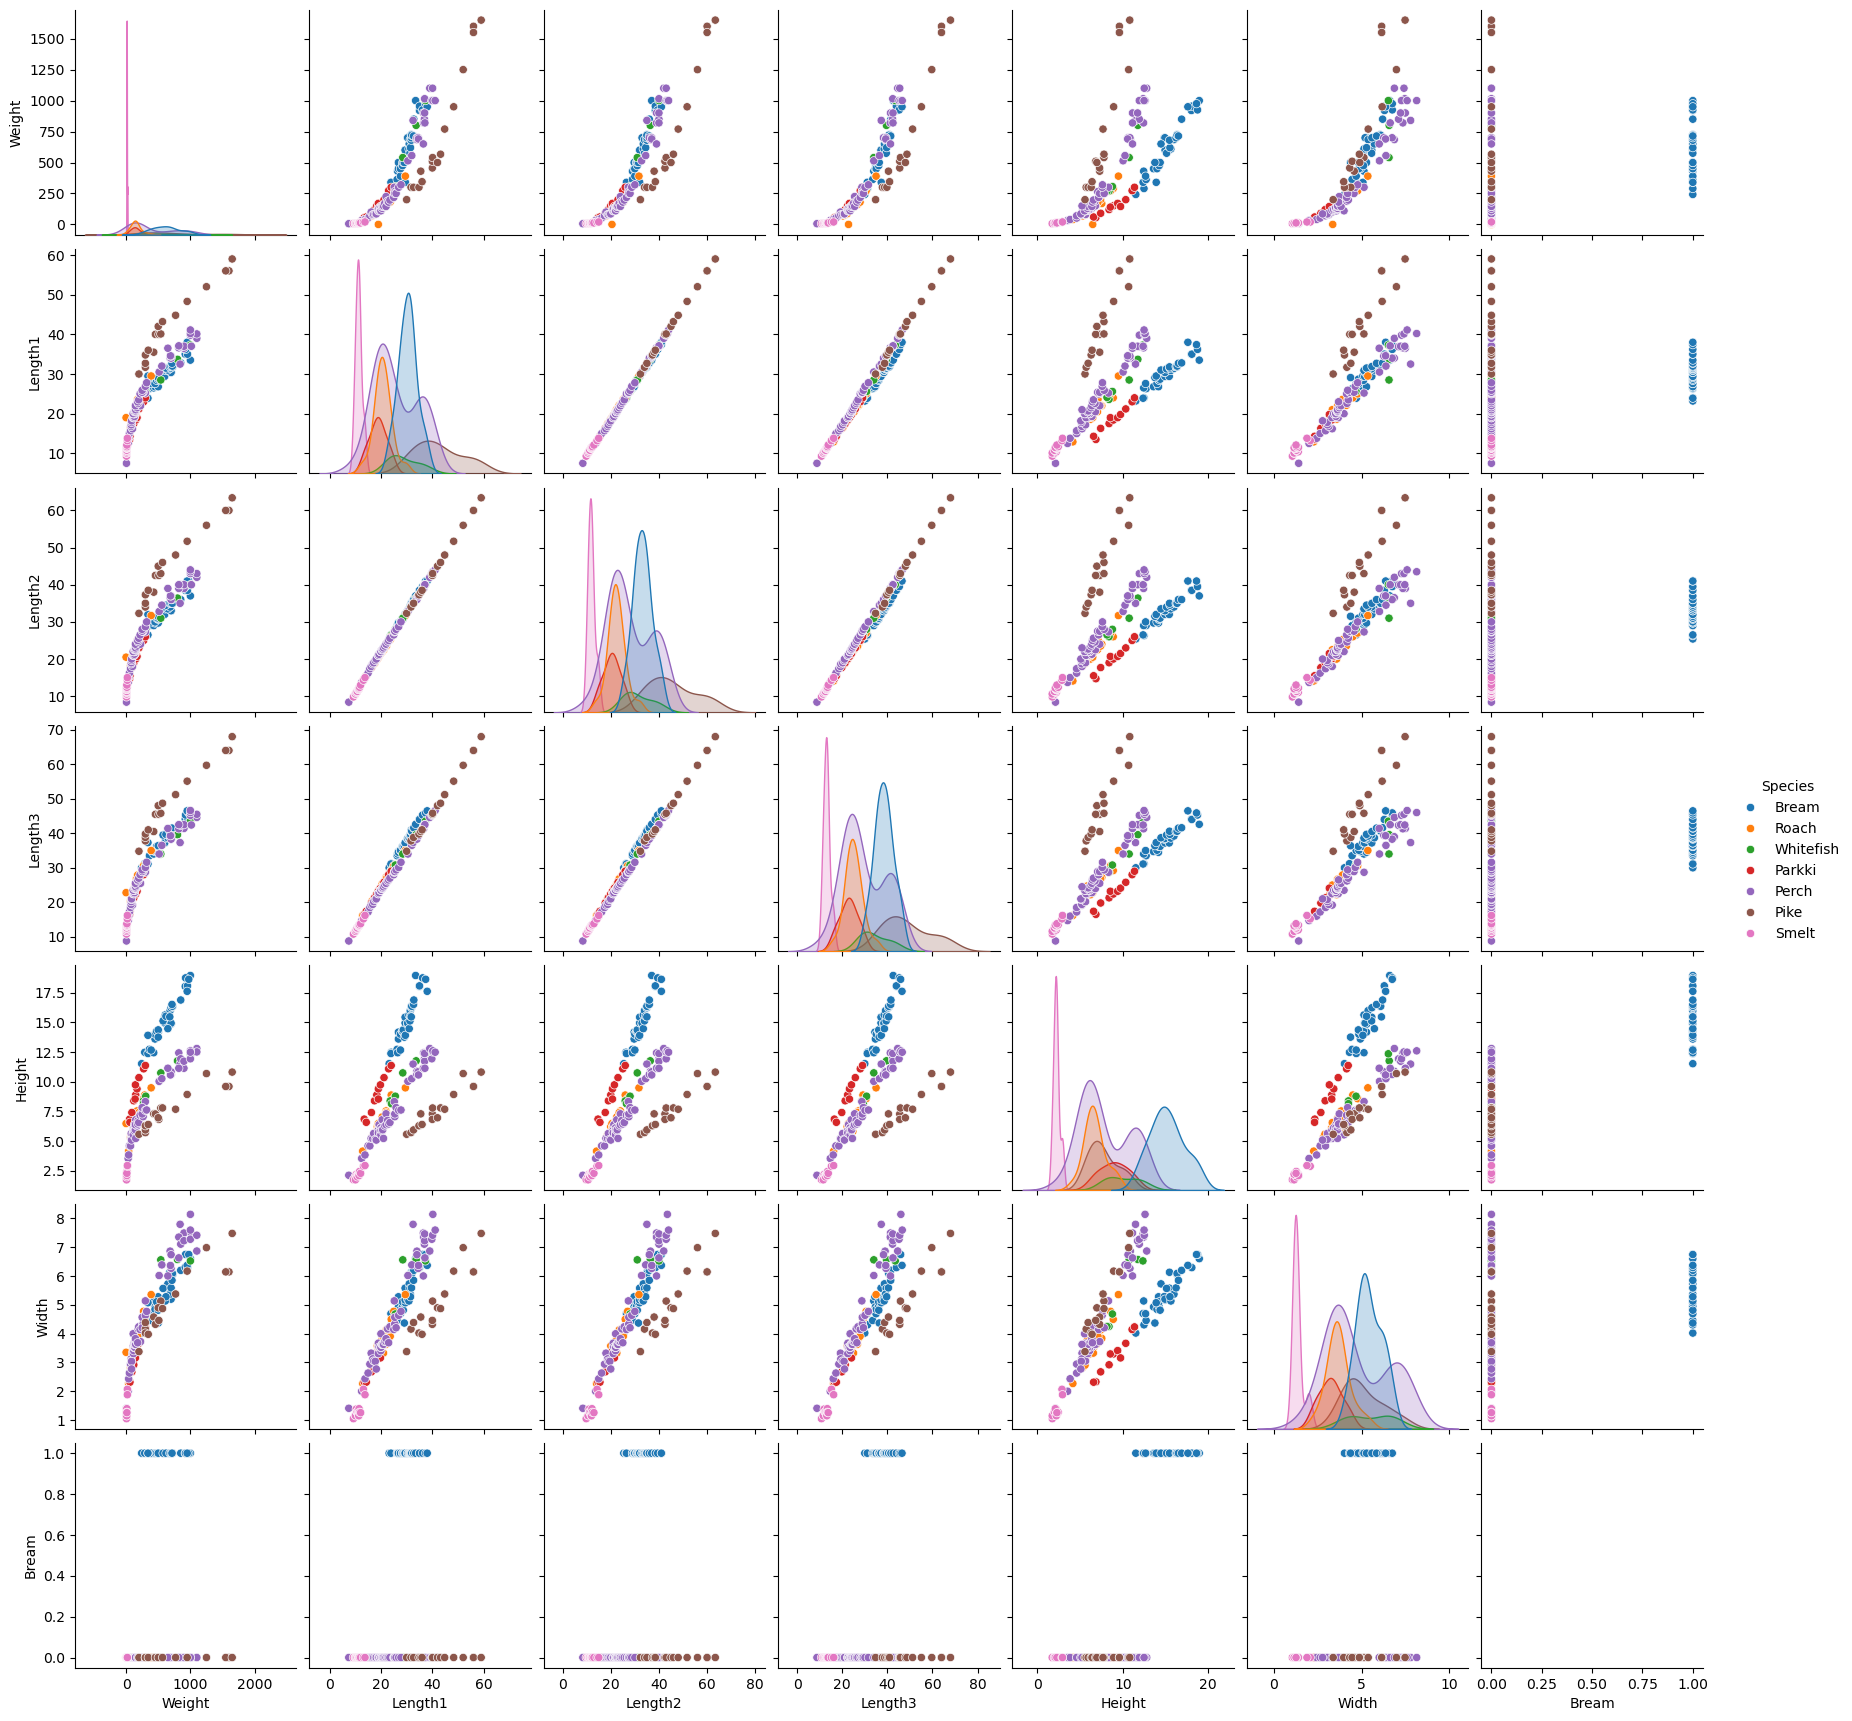

In [107]:
##EDA 
sns.pairplot(df,hue = 'Species')

In [108]:
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [109]:
df.keys()

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Bream'],
      dtype='object')

In [110]:
df_full = pd.merge(df,pd.get_dummies(df['Species'],dtype=int),on =df.index)
df_full

,key_0,Species,Weight,Length1,Length2,Length3,Height,Width,Bream_x,Bream_y,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1,1,0,0,0,0,0,0
1,1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1,1,0,0,0,0,0,0
2,2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1,1,0,0,0,0,0,0
3,3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1,1,0,0,0,0,0,0
4,4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,0,1,0
155,155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,0,1,0
156,156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,0,1,0
157,157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,0,1,0


In [111]:
df_full.keys()

Index(['key_0', 'Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width', 'Bream_x', 'Bream_y', 'Parkki', 'Perch', 'Pike', 'Roach',
       'Smelt', 'Whitefish'],
      dtype='object')

In [112]:
## Test Train Split
df['Bream'] = df['Species'].apply(lambda x: 1 if x=='Bream' else 0)

x_cols = ['Length1', 'Length2', 'Length3', 'Height','Width','Weight'] 
y_cols = ['Bream']

X = df_full[x_cols]
y = df[y_cols]

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 42)

X_test


,Length1,Length2,Length3,Height,Width,Weight
78,16.8,18.7,19.4,5.1992,3.1234,78.0
155,11.7,12.4,13.5,2.4300,1.2690,13.4
128,30.0,32.3,34.8,5.5680,3.3756,200.0
55,23.6,26.0,28.7,8.3804,4.2476,270.0
94,21.0,23.0,24.5,5.2185,3.6260,150.0
29,33.5,37.0,42.6,18.9570,6.6030,1000.0
147,10.1,10.6,11.6,1.7284,1.1484,7.0
51,23.6,25.2,27.9,7.0866,3.9060,180.0
98,22.6,24.6,26.2,6.7334,4.1658,188.0
141,52.0,56.0,59.7,10.6863,6.9849,1250.0


In [113]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width,Bream
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1
...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,0
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,0
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,0
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,0


In [208]:
poly = PolynomialFeatures(degree = 1,include_bias=False)
X_train_poly = poly.fit_transform(X_train)

linreg = LinearRegression()
linreg.fit(X_train_poly,y_train)

print("Intercept (w0):", logreg.intercept_[0])
print("Coefficients (w1,w2):", logreg.coef_[0])


Intercept (w0): -25.105677167716383
Coefficients (w1,w2): [-0.5856498  -0.31537872  1.14142187  1.49142127 -0.01758838 -0.01310514]


In [210]:
y_pred = linreg.predict(X_train_poly)
MSE = mean_squared_error(y_train,y_pred)
R2 = r2_score(y_train,y_pred)
print(MSE)
print(R2) 

0.021528998235677978
0.8638269754732353


closer to one means coser it is to the variance. 
mean_square_error = Calculating the

In [212]:
X_test_poly = poly.transform(X_test)
y_pred = linreg.predict(X_test_poly)
MSE = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
print(MSE)
print(R2) 

0.020662183332657326
0.903826928487995


In [214]:
7007.383189853937
0.9507352480054513

0.9507352480054513